# CNN ASSIGNMENT 2

Student Name - Karan Mahajan

In [4]:
## importing helper librabries
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras.optimizers import SGD



Reading data from the text files and storing them into dataframes with column names

In [5]:
traindf=pd.read_csv("C:/Users/kkara/OneDrive/Desktop/Outex-TC-00030/000/test.txt" ,sep = " ",skiprows =1 , header=None)
traindf.columns = ['filename', 'cl']
traindf

,filename,cl
0,000020.bmp,0
1,000021.bmp,0
2,000022.bmp,0
3,000023.bmp,0
4,000024.bmp,0
5,000025.bmp,0
6,000026.bmp,0
7,000027.bmp,0
8,000028.bmp,0
9,000029.bmp,0


In [6]:
testdf=pd.read_csv("C:/Users/kkara/OneDrive/Desktop/Outex-TC-00030/000/train.txt",sep = " ",skiprows =1 , header=None)
testdf.columns = ['filenames' , 'cl']

In [5]:
datagen=ImageDataGenerator(rescale=1./255)

Giving data via flow from directory with target image size 32,32

In [ ]:
train_generator=datagen.flow_from_dataframe(
dataframe=traindf,
directory="C:/Users/kkara/OneDrive/Desktop/Outex-TC-00030/images",
x_col="filename",
y_col="cl",
has_ext =True,
batch_size=32,
shuffle=True,
class_mode="categorical",
target_size=(32,32))

In [6]:
test_generator=datagen.flow_from_dataframe(
dataframe=testdf,
directory="C:/Users/kkara/OneDrive/Desktop/Outex-TC-00030/images",
x_col="filenames",
y_col="cl",
has_ext=True,
batch_size=32,
shuffle=False,
class_mode="categorical",
target_size=(32,32))

Found 1360 images belonging to 68 classes.


# Perceptron Model

__ Defining layers of perceptron model__

In [7]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(32,32,3)))                       
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(68, activation='softmax'))
                                            
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [8]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
train_history= model.fit_generator(generator=train_generator,
                    validation_steps=STEP_SIZE_TEST,
                    validation_data=test_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    epochs=10
)

Epoch 1/10
340/340 [==============================] - 104s 306ms/step - loss: 4.0162 - acc: 0.0209 - val_loss: 3.7565 - val_acc: 0.0714
Epoch 2/10
340/340 [==============================] - 71s 209ms/step - loss: 3.3828 - acc: 0.1121 - val_loss: 2.9940 - val_acc: 0.1679
Epoch 3/10
340/340 [==============================] - 78s 231ms/step - loss: 2.8232 - acc: 0.1792 - val_loss: 2.5783 - val_acc: 0.2229
Epoch 4/10
340/340 [==============================] - 70s 205ms/step - loss: 2.4758 - acc: 0.2326 - val_loss: 2.3161 - val_acc: 0.2726
Epoch 5/10
340/340 [==============================] - 74s 217ms/step - loss: 2.2851 - acc: 0.2609 - val_loss: 2.1160 - val_acc: 0.3102
Epoch 6/10
340/340 [==============================] - 78s 229ms/step - loss: 2.1452 - acc: 0.3024 - val_loss: 2.0119 - val_acc: 0.3208
Epoch 7/10
340/340 [==============================] - 75s 222ms/step - loss: 2.0526 - acc: 0.3286 - val_loss: 1.9971 - val_acc: 0.3117
Epoch 8/10
340/340 [==============================] - 

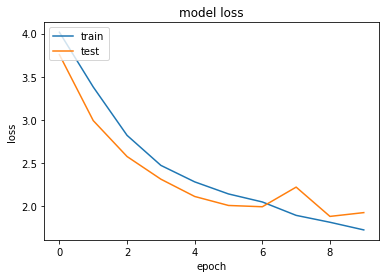

In [9]:
# summarizing  history for loss

plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## LeNEt-5 Model 



Here we are defining new train and test generators with image size that of original samples 256X256

In [ ]:
train_generator1=datagen.flow_from_dataframe(
dataframe=traindf,
directory="C:/Users/kkara/OneDrive/Desktop/Outex-TC-00030/images",
x_col="filename",
y_col="cl",
has_ext =True,
batch_size=32,
shuffle=True,
class_mode="categorical")

test_generator1=datagen.flow_from_dataframe(
dataframe=testdf,
directory="C:/Users/kkara/OneDrive/Desktop/Outex-TC-00030/images",
x_col="filenames",
y_col="cl",
has_ext=True,
batch_size=32,
shuffle=False,
class_mode="categorical")

## Here we are defining layers of the model

Layer 1 - Conv layer + Pooling layer
Layer 2 - Conv layer + Pooling layer + Flatten

Now we are going to connect layers 

__Layer 3, 4, 5 are fully connected layers__

In [7]:
model_le = Sequential()

#Layer 1
model_le.add(Conv2D(filters = 6, kernel_size = 5, strides = 1, activation = 'relu', input_shape = (256, 256, 3)))
model_le.add(MaxPooling2D(pool_size = 2, strides = 2))

#Layer 2
model_le.add(Conv2D(filters = 16, kernel_size = 5, strides = 1, activation = 'relu'))

#Pooling Layer 2
model_le.add(MaxPooling2D(pool_size = 2, strides = 2))
model_le.add(Flatten())

#Layer 3
model_le.add(Dense(units = 120, activation = 'relu'))

#Layer 4
model_le.add(Dense(units = 84, activation = 'relu'))

#Layer 5 - output layer
model_le.add(Dense(units = 68, activation = 'softmax'))


model_le.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [8]:
STEP_SIZE_TRAIN=train_generator1.n//train_generator1.batch_size
STEP_SIZE_TEST=test_generator1.n//test_generator1.batch_size
train_history= model_le.fit_generator(generator=train_generator1,
                    validation_steps=STEP_SIZE_TEST,
                    validation_data=test_generator1,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    epochs=10
)

Epoch 1/10
340/340 [==============================] - 1106s 3s/step - loss: 2.8305 - acc: 0.1684 - val_loss: 1.9604 - val_acc: 0.3095
Epoch 2/10
340/340 [==============================] - 1134s 3s/step - loss: 1.6722 - acc: 0.4246 - val_loss: 1.6147 - val_acc: 0.4465
Epoch 3/10
340/340 [==============================] - 1102s 3s/step - loss: 1.2227 - acc: 0.5674 - val_loss: 1.3218 - val_acc: 0.5211
Epoch 4/10
340/340 [==============================] - 1109s 3s/step - loss: 1.0284 - acc: 0.6339 - val_loss: 1.3223 - val_acc: 0.5369
Epoch 5/10
340/340 [==============================] - 1145s 3s/step - loss: 0.8162 - acc: 0.7051 - val_loss: 1.1931 - val_acc: 0.5941
Epoch 6/10
340/340 [==============================] - 1147s 3s/step - loss: 0.7165 - acc: 0.7362 - val_loss: 1.2242 - val_acc: 0.5685
Epoch 7/10
340/340 [==============================] - 1151s 3s/step - loss: 0.5835 - acc: 0.7831 - val_loss: 1.2443 - val_acc: 0.6077
Epoch 8/10
340/340 [==============================] - 1943s 6s

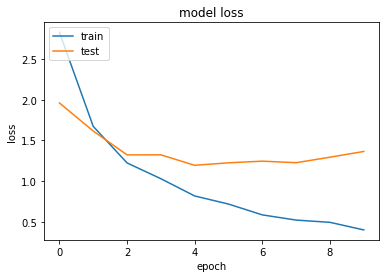

In [10]:
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Using VGG16 



In [9]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization

vgg_model = VGG16(weights = 'imagenet', include_top = False, input_shape = (256,256,3))

vgg_model.layers.pop()


x = Flatten()(vgg_model.output)
x = Dense(120, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
predictions = Dense(68, activation = 'softmax')(x)


new_model = Model(input = vgg_model.input, output = predictions)

new_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
 

C:\Users\kkara\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [ ]:

STEP_SIZE_TRAIN=train_generator1.n//train_generator1.batch_size
STEP_SIZE_TEST=test_generator1.n//test_generator1.batch_size
train_history= new_model.fit_generator(generator=train_generator1,
                    validation_steps=STEP_SIZE_TEST,
                    validation_data=test_generator1,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    epochs=3
)

Epoch 1/3
  2/340 [..............................] - ETA: 9:33:53 - loss: 4.6220 - acc: 0.0000e+00

__Computer didnt had so much of the computing power so didn't run__

*********************************
*******************************

# Visualization with TSNE

In [11]:
traindf = pd.read_csv("C:/Users/kkara/OneDrive/Desktop/Outex-TC-00030/000/test.txt" ,sep = " ",skiprows =1 , header=None)
traindf.columns = ['filename' , 'cl']


training =traindf.sample(n=4000).reset_index()

training

,index,filename,cl
0,8799,009899.bmp,54
1,2216,002496.bmp,13
2,3448,003888.bmp,21
3,1632,001852.bmp,10
4,911,001031.bmp,5
5,7174,008074.bmp,44
6,4001,004521.bmp,25
7,1665,001885.bmp,10
8,10701,012041.bmp,66
9,9935,011195.bmp,62


Making array of images and labels for the tsne 

In [15]:
from numpy import array
images =[]
image =[]
labels =[]

from PIL import Image

for i in range((training['filename'].size)):
    im = Image.open("C:/Users/kkara/OneDrive/Desktop/Outex-TC-00030/images/" + training["filename"][i]).convert('L')
    im= array(im)
    image.append(im)
    
 # C:\Users\kkara\OneDrive\Desktop\Outex-TC-00030\images
labels = training.cl.values    
images = np.array(image)

labels = np.array(labels)

In [16]:
from sklearn.preprocessing import StandardScaler

nsamples, nx, ny = images.shape

images = images.reshape((nsamples, nx * ny))
images_scaled = StandardScaler().fit_transform(images)

images_scaled.shape

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=180)
pca_result = pca.fit_transform(images)

C:\Users\kkara\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Defining function for the plot

In [17]:
def visualize_scatter(data_2d, label_ids, figsize=(20,20)):
    plt.figure(figsize=figsize)
    plt.grid()
    
    nb_classes = len(np.unique(label_ids))
    
    for label_id in np.unique(label_ids):
        plt.scatter(data_2d[np.where(label_ids == label_id), 0],
                    data_2d[np.where(label_ids == label_id), 1],
                    marker='o',
                    color= plt.cm.Set1(label_id / float(nb_classes)),
                    linewidth='1',
                    alpha=0.8,
                    label=id_to_label_dict[label_id])
    plt.legend(loc='best')

    
    
label_to_id_dict = {v:i for i,v in enumerate(np.unique(labels))}
id_to_label_dict = {v: k for k, v in label_to_id_dict.items()}
label_ids = np.array([label_to_id_dict[x] for x in labels])


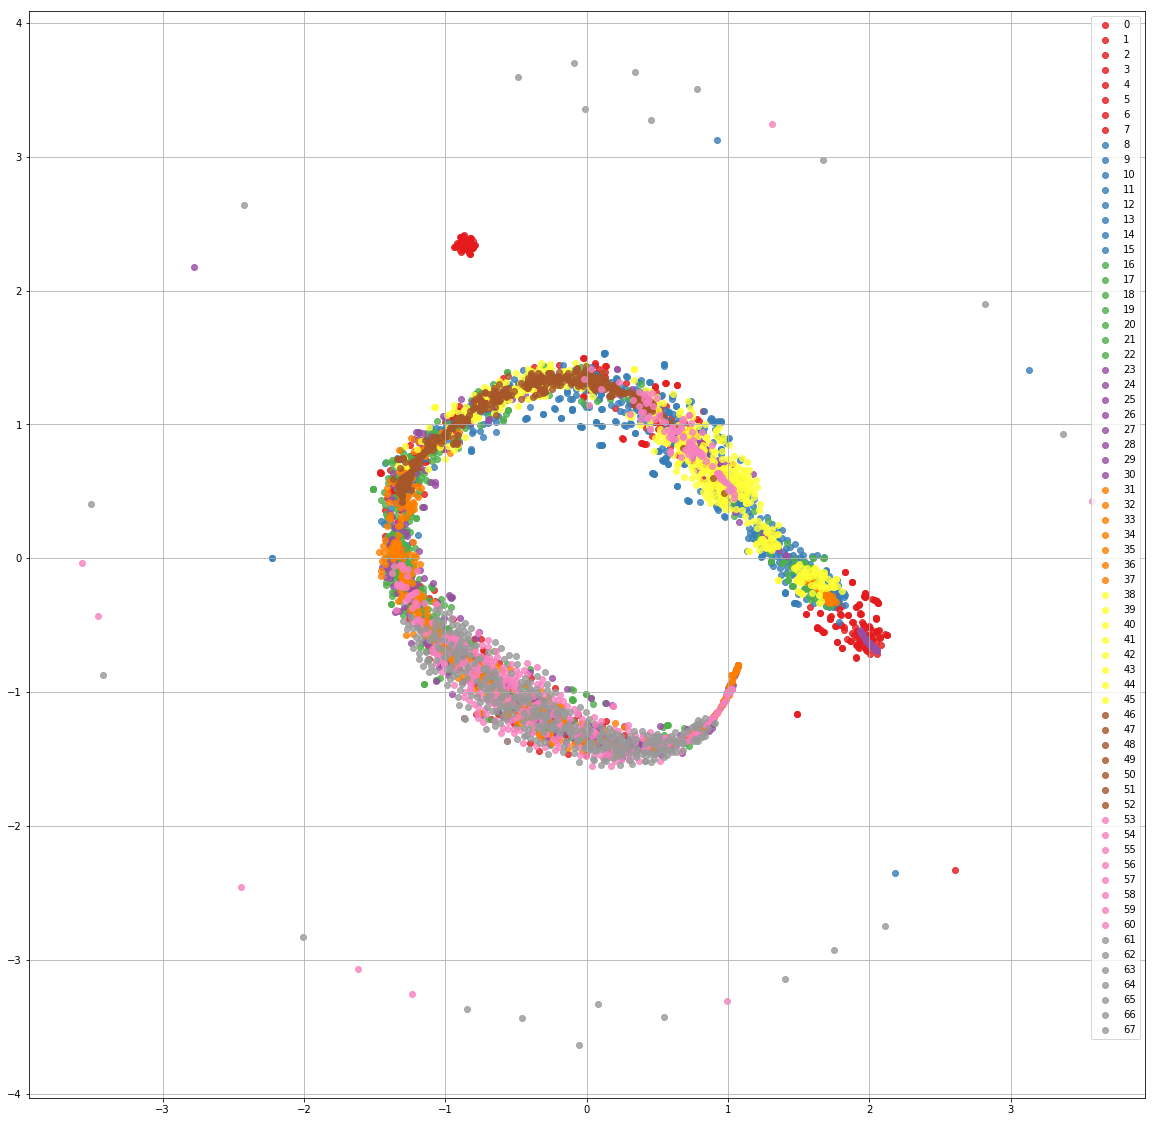

In [18]:
tsne = TSNE(n_components=2, perplexity=40.0)
tsne_result = tsne.fit_transform(pca_result)
tsne_result_scaled = StandardScaler().fit_transform(tsne_result)
visualize_scatter(tsne_result_scaled, label_ids)

__Here in scatter plot we observe that the closer the two images are in realted the closer they will be.
We see that dots of different colour closer this means textures of different classes are similar. Closer they are more similar they appear.__